In [3]:
import math

x_train =    [[4.9176,1,3.472,0.998,1,7,4,42,],[4.5573,1,4.05,1.232,1,6,3,54,],
                [5.0597,1,4.455,1.121,1,6,3,42,],[14.4598,2.5,12.8,3,2,9,5,14,],
                [5.05,1,5,1.02,0,5,2,46,],[8.2464,1.5,5.15,1.664,2,8,4,50,],
                [9.0384,1,7.8,1.5,1.5,7,3,23,],[4.5429,1,2.275,1.175,1,6,3,40],
                [3.891,1,4.455,0.988,1,6,3,56],[5.898,1,5.85,1.24,1,7,3,51],
                [16.4202,2.5,9.8,3.42,2,10,5,42],[5.9592,1,6.666,1.121,2,6,3,32],
                [7.7841,1.5,7.102,1.376,1,6,3,17],[5.0208,1,3.531,1.5,2,7,4,62],
                [5.6039,1,9.52,1.501,0,6,3,32],[5.8282,1,6.435,1.225,2,6,3,32],
                [5.3003,1,4.9883,1.552,1,6,3,30],[6.2712,1,5.52,0.975,1,5,2,30],
                [5.6039,1,9.52,1.501,0,6,3,32],[6.6969,1.5,6.902,1.488,1.5,7,3,22]]

y_train =    [  ['Apartment'],['Apartment'],['Apartment'],['Apartment'],
                ['Apartment'],['Apartment'],['Apartment'],['Condo'],
                ['Condo'],['Condo'],['Condo'],['Condo'],
                ['Condo'],['House'],['House'],['House'],
                ['House'],['House'],['House'],['House']]

x_test = [   [6.0931,1.5,6.7265,1.652,1,6,3,44],[8.3607,1.5,9.15,1.777,2,8,4,48],
             [8.14,1,8,1.504,2,7,3,3],[9.1416,1.5,7.3262,1.831,1.5,8,4,31],
             [12,1.5,5,1.2,2,6,3,30]]

y_test = [['Apartment'], ['House'], ['House'], ['Apartment'], ['Apartment']]


all_distances = []
sorted_preds = []

for input in range(5):

    temp_distances = []

    for i in range(20):
        temp_distances.append(math.dist(x_train[i], x_test[input]))

    all_distances.append(temp_distances)
    myDict = {key: temp_distances.index(key) for key in temp_distances}
    temp_distances.sort()

    sorted = []
    for i in range(20):
        sorted.append(myDict.get(temp_distances[i]))
    sorted_preds.append(sorted)
    

sorted_preds_lookup = []

for i in range(5):
    
    temp_list = []
    for pred in range(20):
        
        temp_list.append(y_train[sorted_preds[i][pred]])
    
    sorted_preds_lookup.append(temp_list)

In [13]:
def make_predictions(k):
    
    right = 0
    wrong = 0
    tie_count = 0
    accuracy = 0
    
    for input in range(5):
        apartment_count = 0
        condo_count = 0
        house_count = 0
        prediction = ""
    
        for i in range(k):
            
            pred = sorted_preds[input][i]
            
            if (pred >= 0 and pred <=6):
                apartment_count += 1
                
            elif (pred >= 7 and pred <=12):
                condo_count += 1
            
            elif (pred >= 13 and pred <=19):
                house_count += 1
        
        if (apartment_count > condo_count and apartment_count > house_count):
            prediction = 'Apartment'
        elif (house_count > apartment_count and house_count > condo_count):
            prediction = 'House'
        elif (condo_count > apartment_count and condo_count > house_count):
            prediction = 'House'
        else:
            prediction = 'tie'
            
        
        if (prediction == y_test[input][0]):
            right += 1
        elif (prediction == 'tie'):
            tie_count +=1
        else:
            wrong += 1
        
        print(f"Input {input}:")
        print(f'Apartment Votes: {apartment_count}')
        print(f'Condo Votes: {condo_count}')
        print(f'House Votes: {house_count}')
        print(f"Class Prediction: {prediction}")
        print('\n')
        
    accuracy = right / 5
    
    print(f'Summary: \nk = {k}')
    print(f'Number Right: {right}')
    print(f'Number Wrong: {wrong}')
    print(f'Number Uncertain: {tie_count}')
    print(f'Test Accuracy: {accuracy}\n\n')
    
    return accuracy

In [29]:
accuracies = []

for i in range(20):
    accuracies.append(make_predictions(i + 1))

Input 0:
Apartment Votes: 1
Condo Votes: 0
House Votes: 0
Class Prediction: Apartment


Input 1:
Apartment Votes: 1
Condo Votes: 0
House Votes: 0
Class Prediction: Apartment


Input 2:
Apartment Votes: 1
Condo Votes: 0
House Votes: 0
Class Prediction: Apartment


Input 3:
Apartment Votes: 0
Condo Votes: 1
House Votes: 0
Class Prediction: House


Input 4:
Apartment Votes: 0
Condo Votes: 0
House Votes: 1
Class Prediction: House


Summary: 
k = 1
Number Right: 1
Number Wrong: 4
Number Uncertain: 0
Test Accuracy: 0.2


Input 0:
Apartment Votes: 2
Condo Votes: 0
House Votes: 0
Class Prediction: Apartment


Input 1:
Apartment Votes: 1
Condo Votes: 1
House Votes: 0
Class Prediction: tie


Input 2:
Apartment Votes: 1
Condo Votes: 1
House Votes: 0
Class Prediction: tie


Input 3:
Apartment Votes: 0
Condo Votes: 1
House Votes: 1
Class Prediction: tie


Input 4:
Apartment Votes: 0
Condo Votes: 1
House Votes: 1
Class Prediction: tie


Summary: 
k = 2
Number Right: 1
Number Wrong: 0
Number Uncertai

### Important Notes

I handled ties in this model by just calling the input a tie instead of assigning a class. I preferred this way because I'd rather draw a clear distinction between actual class predictions and defaulted predictions due to a tie.

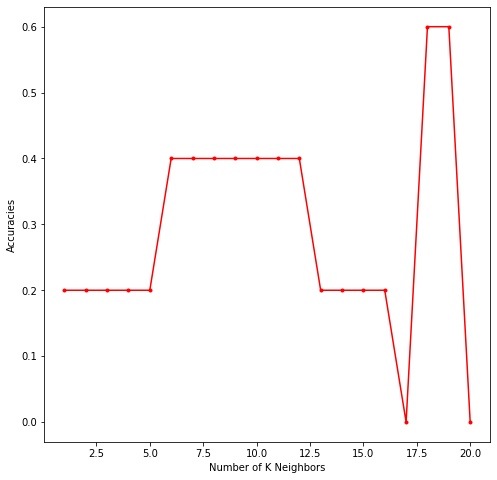

In [30]:
import matplotlib.pyplot as plt
import numpy as np

num_k = np.linspace(1, 20, 20)

plt.figure(figsize = (8,8))
plt.plot(num_k, accuracies , marker='.', color='red')

plt.xlabel("Number of K Neighbors")
plt.ylabel("Accuracies")
plt.show()


I have plotted the accuracies against the number of neighbors. I went ahead and plotted the results all the way to twenty neighbors to see what the results looked like. As you can see, the accuracy is the same for picking 1-5 neighbors. The model doesn't see an increase in accuracy until the sixth neighbor. I believe this is because of the number of ties or uncertain guesses that we have. If one examines the output guesses from the test inputs, one can see that there are a large amount of ties in the number of votes. I believe we could increase the accuracy of this model by providing a greater number of input samples and using a larger number for K. I believe these changes would allow the model to have less ties and be able to make more confident guesses.